In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data=pd.read_csv('/kaggle/input/financial-risk/financial_risk_assessment.csv')
data.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [4]:
data.shape

(15000, 20)

In [5]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

In [6]:
data.describe().style.background_gradient(cmap='Pastel2_r')

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.026510,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.411300,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.000000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.000000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.000000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.000000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.000000,4.000000,2.000000


In [7]:
data.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [8]:
# Remove the null values
data=data.dropna()
data.shape

(5716, 20)

In [9]:
#duplicate values
duplicates=data.duplicated().sum()
print(f'The data set contains {duplicates} values')

The data set contains 0 values


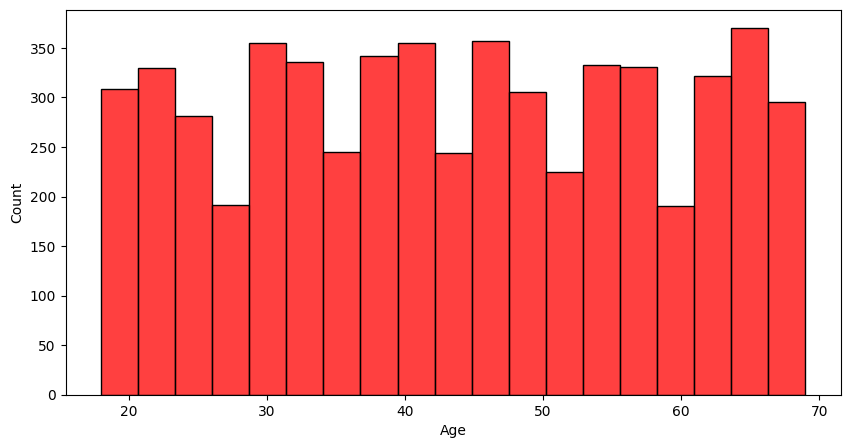

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data['Age'],color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

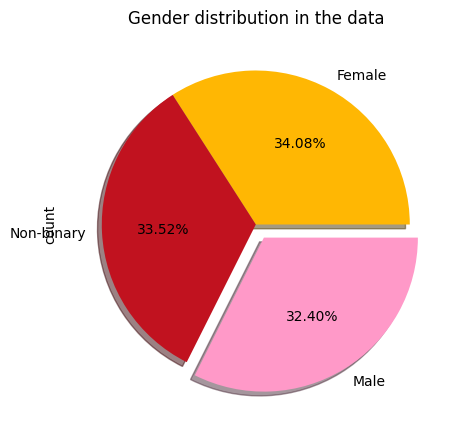

In [11]:
#Gender Percentage
plt.figure(figsize=(10,5))
data['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
     explode=[0,0,0.1],
    labels=['Female','Non-binary','Male'],
    colors=['#ffb703','#c1121f','#ff99c8'],
    autopct='%1.2f%%',
    shadow=True)
plt.title('Gender distribution in the data')
plt.show()

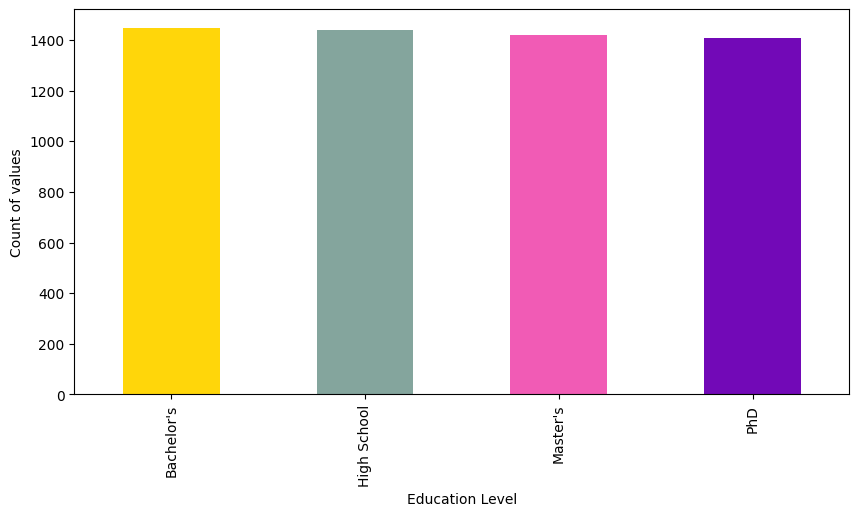

In [12]:
# Visisualize the Education level in the data
data['Education Level'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#ffd60a','#84a59d','#f15bb5','#7209b7'])
plt.xlabel('Education Level')
plt.ylabel('Count of values')
plt.show()

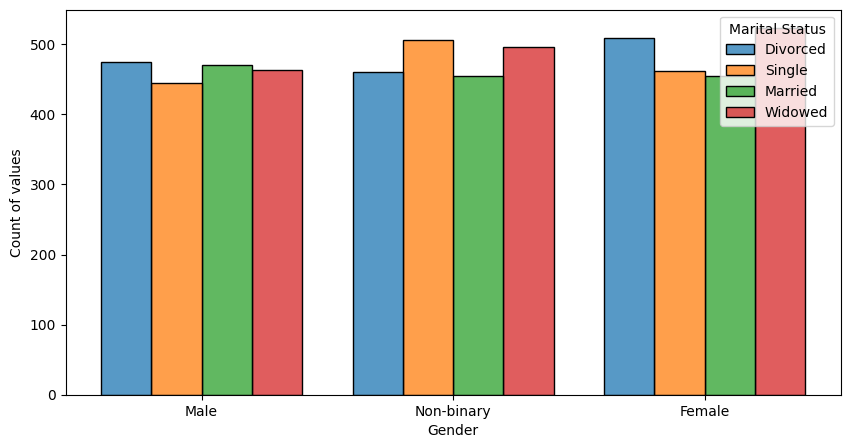

In [13]:
#To visiualize the in each gender with differnet marital status
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='Gender',hue='Marital Status',multiple="dodge", shrink=.8)
plt.xlabel('Gender')
plt.ylabel('Count of values')
plt.show()

<Figure size 1000x500 with 0 Axes>

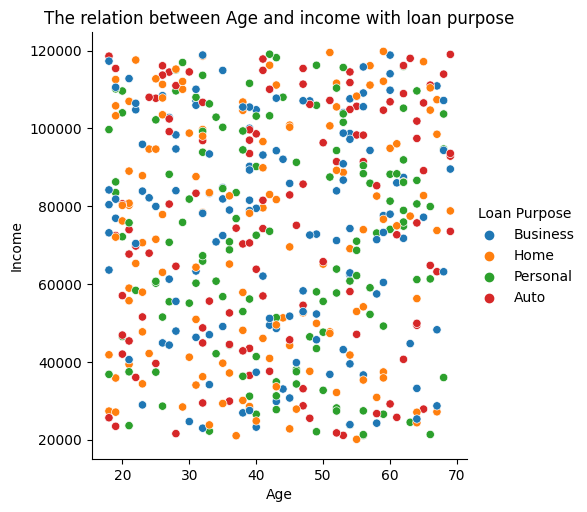

In [14]:
# let's find the realtion beteen aga and income with loan purpose 
plt.figure(figsize=(10,5))
sns.relplot(x ="Age", y ="Income", data = data[:500],hue='Loan Purpose')
plt.title('The relation between Age and income with loan purpose')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [15]:
# Visualize the h
employe=pd.DataFrame(data.groupby('Gender')['Employment Status'].value_counts())
employe.unstack().style.background_gradient(cmap='Reds')

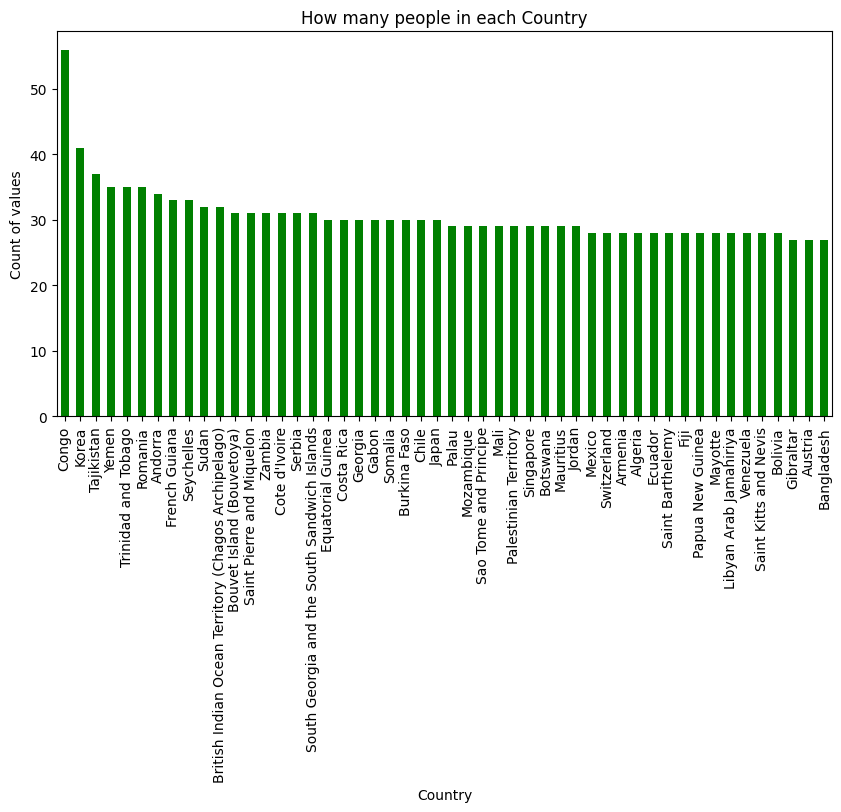

In [16]:
# How many people from each country 
data['Country'].value_counts().sort_values(ascending=False).head(50)\
.plot(kind='bar',figsize=(10,5),color='green')
plt.xlabel('Country')
plt.ylabel('Count of values')
plt.title('How many people in each Country')
plt.show()

In [17]:
# Find the average credit score in each category
aver_credit_score=pd.DataFrame(data.groupby('Gender')['Credit Score'].mean().sort_values(ascending=False))
aver_credit_score.style.background_gradient(cmap='winter_r')

,Credit Score
Gender,
Non-binary,700.377349
Male,698.884989
Female,698.130390


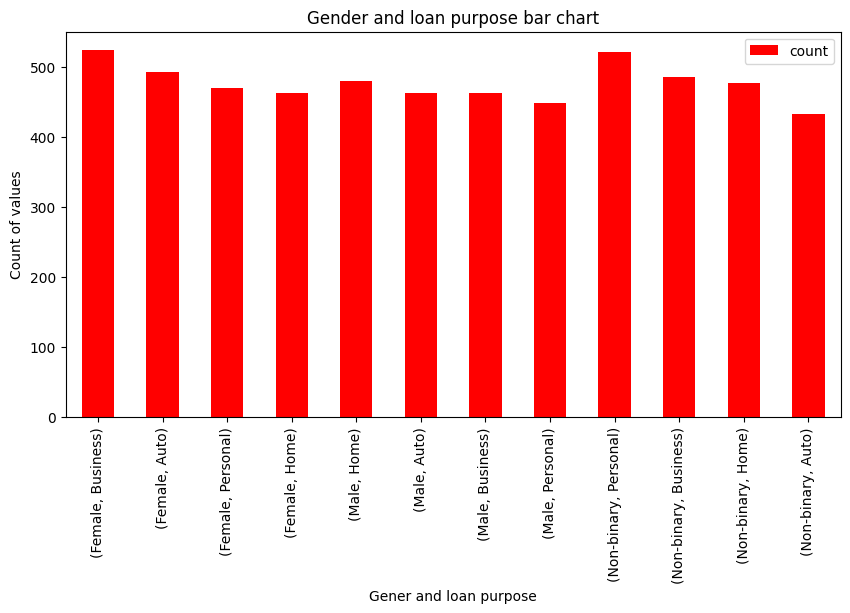

In [18]:
gender_loan=pd.DataFrame(data.groupby('Gender')['Loan Purpose'].value_counts())
gender_loan.plot(kind='bar',figsize=(10,5),color=['red'])
plt.title('Gender and loan purpose bar chart')
plt.xlabel('Gener and loan purpose')
plt.ylabel('Count of values')
plt.show()

In [19]:
data.head(1)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low


In [20]:
Education_exp=pd.DataFrame(data.groupby('Education Level')['Years at Current Job'].value_counts().sort_values(ascending=False))
Education_exp.unstack().style.background_gradient(cmap='copper_r')

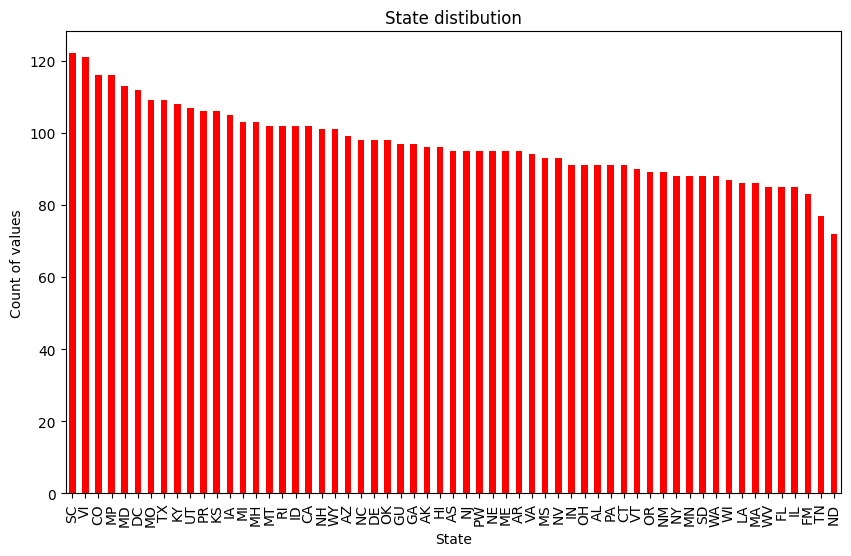

In [21]:
plt.figure(figsize=(10,6))
data['State'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',color=['red'])
plt.title('State distibution')
plt.xlabel('State')
plt.ylabel('Count of values')
plt.show()

<Figure size 1000x500 with 0 Axes>

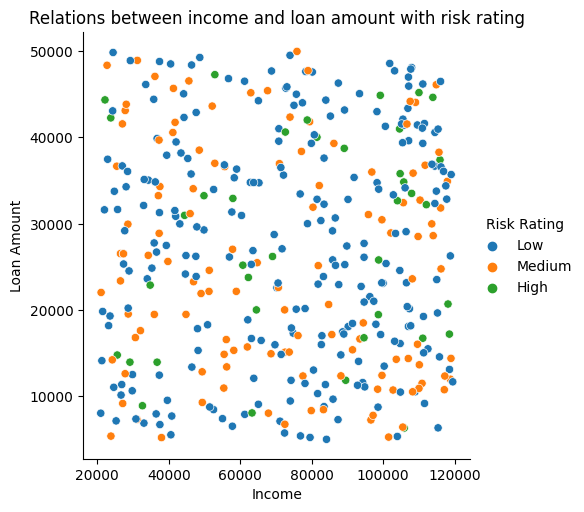

In [22]:
plt.figure(figsize=(10,5))
sns.relplot(data=data[:400],x='Income',y='Loan Amount',hue='Risk Rating')
plt.title('Relations between income and loan amount with risk rating')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

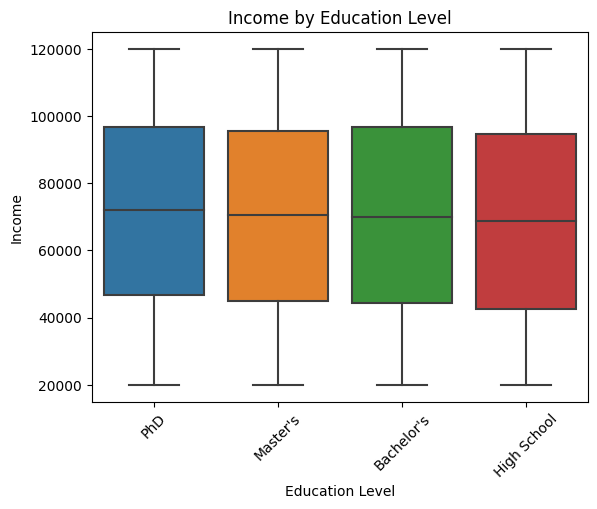

In [23]:
sns.boxplot(data=data, x='Education Level', y='Income')
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.show()

In [24]:
averge_loan_credit_score=pd.DataFrame(data.groupby('Education Level')[['Credit Score','Loan Amount']].mean())
averge_loan_credit_score.style.background_gradient(cmap='Blues')

,Credit Score,Loan Amount
Education Level,,
Bachelor's,699.112491,27466.619048
High School,696.977067,27366.248089
Master's,699.099296,27729.043662
PhD,701.371449,27752.923295


In [25]:
employe_risk=pd.DataFrame(data.groupby(['Employment Status','Risk Rating'])['Gender'].value_counts())
employe_risk.unstack().style.background_gradient(cmap='Reds_r')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [27]:
cate=data.select_dtypes(include='object')
cate.head()

,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,City,State,Country,Risk Rating
0,Male,PhD,Divorced,Business,Unemployed,Poor,Port Elizabeth,AS,Cyprus,Low
2,Non-binary,Master's,Single,Home,Employed,Fair,South Scott,OK,Luxembourg,Medium
3,Male,Bachelor's,Single,Personal,Unemployed,Excellent,Robinhaven,PR,Uganda,Medium
10,Non-binary,Master's,Single,Home,Employed,Excellent,Matthewborough,NH,French Guiana,Medium
16,Male,High School,Married,Personal,Unemployed,Excellent,Christophermouth,MO,Tonga,Medium


In [28]:
label=LabelEncoder()
data['Gender']=label.fit_transform(data['Gender'])
data['Education Level']=label.fit_transform(data['Education Level'])
data['Marital Status']=label.fit_transform(data['Marital Status'])
data['Loan Purpose']=label.fit_transform(data['Loan Purpose'])
data['Employment Status']=label.fit_transform(data['Employment Status'])
data['Payment History']=label.fit_transform(data['Payment History'])
data['City']=label.fit_transform(data['City'])
data['State']=label.fit_transform(data['State'])
data['Country']=label.fit_transform(data['Country'])
data['Risk Rating']=label.fit_transform(data['Risk Rating'])

In [29]:
X=data.drop('Risk Rating',axis=1)
y=data['Risk Rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
logist=LogisticRegression()
logist.fit(X_train,y_train)
y_pred=logist.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
print(f'Logisticmodel accuracy_score {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

Logisticmodel accuracy_score 0.6067179846046186
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.61      1.00      0.76       867
           2       0.00      0.00      0.00       427

    accuracy                           0.61      1429
   macro avg       0.20      0.33      0.25      1429
weighted avg       0.37      0.61      0.46      1429



In [32]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(splitter='random',criterion='entropy',max_depth=5)
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)
print(f'The decisiontree model {accuracy_score(y_test,tree_pred)}')
print(classification_report(y_test,tree_pred))

The decisiontree model 0.5941217634709587
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.61      0.96      0.74       867
           2       0.32      0.04      0.07       427

    accuracy                           0.59      1429
   macro avg       0.31      0.33      0.27      1429
weighted avg       0.46      0.59      0.47      1429



In [33]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=50,criterion='log_loss')
random.fit(X_train,y_train)
random_pred=random.predict(X_test)
print(f'The Randomforest model accuracy score {accuracy_score(y_test,random_pred)}')
print(classification_report(y_test,random_pred))

The Randomforest model accuracy score 0.5948215535339398
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.61      0.97      0.75       867
           2       0.21      0.02      0.03       427

    accuracy                           0.59      1429
   macro avg       0.27      0.33      0.26      1429
weighted avg       0.43      0.59      0.46      1429

